In [29]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
app_train = pd.read_csv('application_train.csv')
POS_CASH_bal = pd.read_csv('POS_CASH_balance.csv')
bureau_bal = pd.read_csv('bureau_balance.csv')
previous_app = pd.read_csv('previous_application.csv')
instal_pay = pd.read_csv('installments_payments.csv')
credit_card_bal = pd.read_csv('credit_card_balance.csv')
bureau = pd.read_csv('bureau.csv')
application_test = pd.read_csv('application_test.csv')
print('Size of application_train data', app_train.shape)
print('Size of POS_CASH_balance data', POS_CASH_bal.shape)
print('Size of bureau_balance data', bureau_bal.shape)
print('Size of previous_application data', previous_app.shape)
print('Size of installments_payments data', instal_pay .shape)
print('Size of credit_card_balance data', credit_card_bal.shape)
print('Size of bureau data', bureau.shape)

Size of application_train data (307511, 122)
Size of POS_CASH_balance data (10001358, 8)
Size of bureau_balance data (27299925, 3)
Size of previous_application data (1670214, 37)
Size of installments_payments data (13605401, 8)
Size of credit_card_balance data (3840312, 23)
Size of bureau data (1716428, 17)


In [5]:
numerical = [i for i in app_train.columns if app_train.dtypes[i] != 'object']
categorical = [i for i in app_train.columns if app_train.dtypes[i] == 'object']
print("numerical: {}, categorical: {}" .format (len(numerical),len(categorical)))

numerical: 106, categorical: 16


## EDA

In [9]:
app_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
num = [col for col in app_train.columns.values if app_train[col].dtype != 'object']
print (num)

['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEAR

In [11]:
cat= [col for col in app_train.columns.values if app_train[col].dtype == 'object']
print (cat)

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


### check target variabl, the data is suffering from imbalance, we'll handlimg imbalance data later 

In [122]:
total = app_train['TARGET'].value_counts()
percent = (app_train['TARGET'].value_counts()/len(app_train)*100)
target_var  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
target_var.head(50)

,Total,Percent
0,282686,91.927118
1,24825,8.072882


In [23]:
total = app_train.isnull().sum().sort_values(ascending = False)
percent = (app_train.isnull().sum()/app_train.isnull().count()*100).sort_values(ascending = False)
missing_app_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_app_train_data.head(50)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


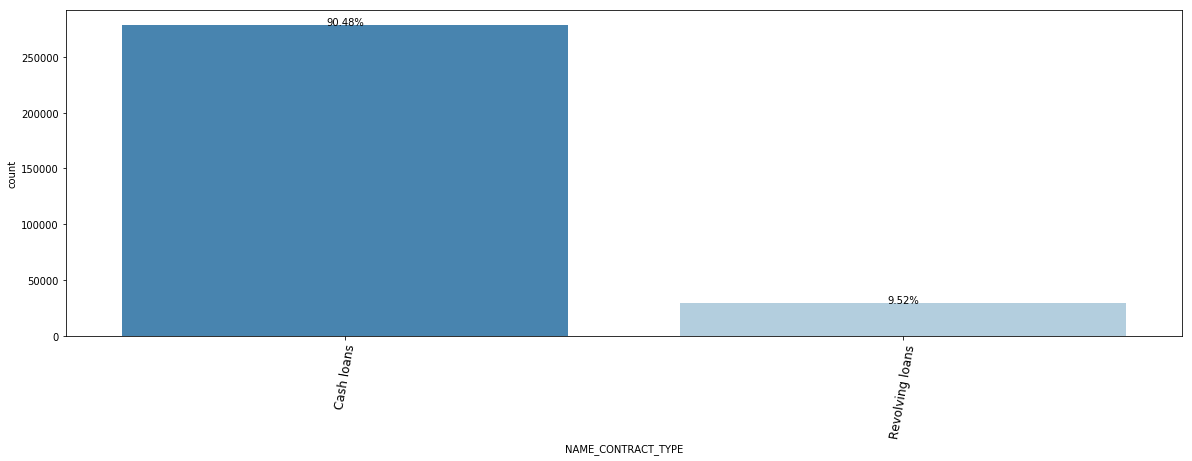

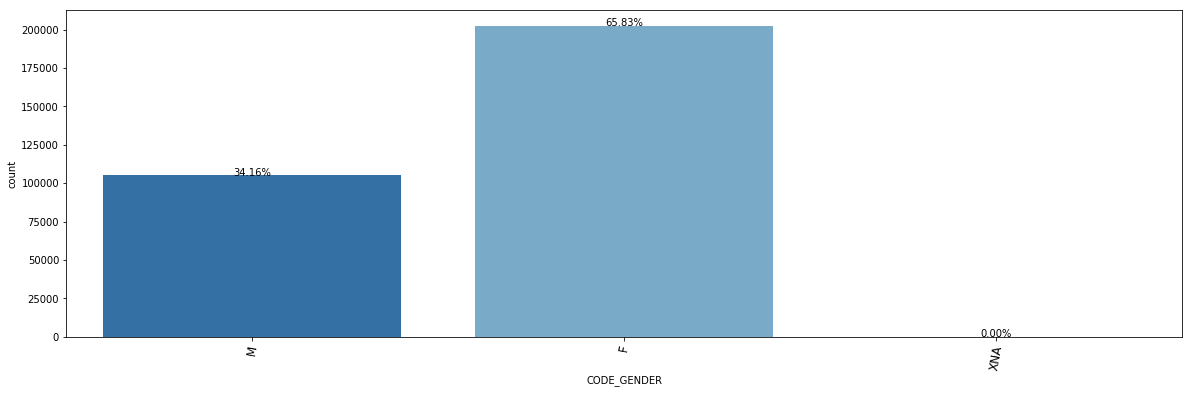

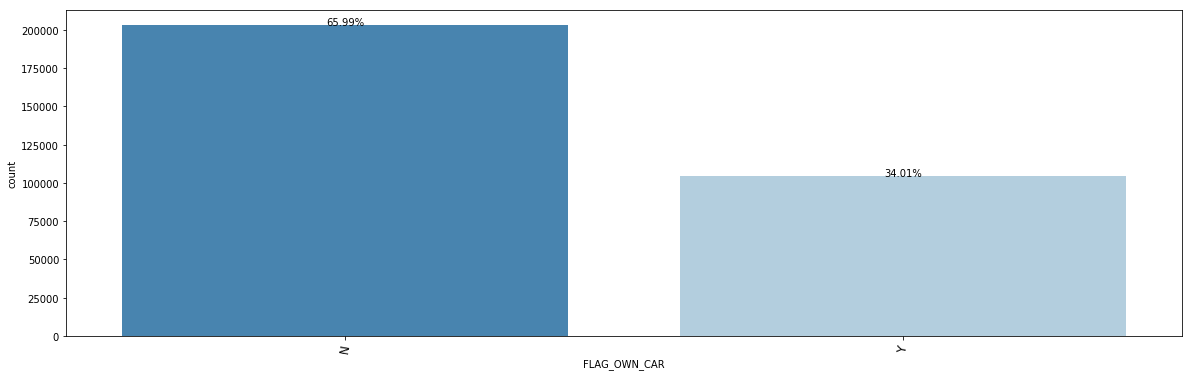

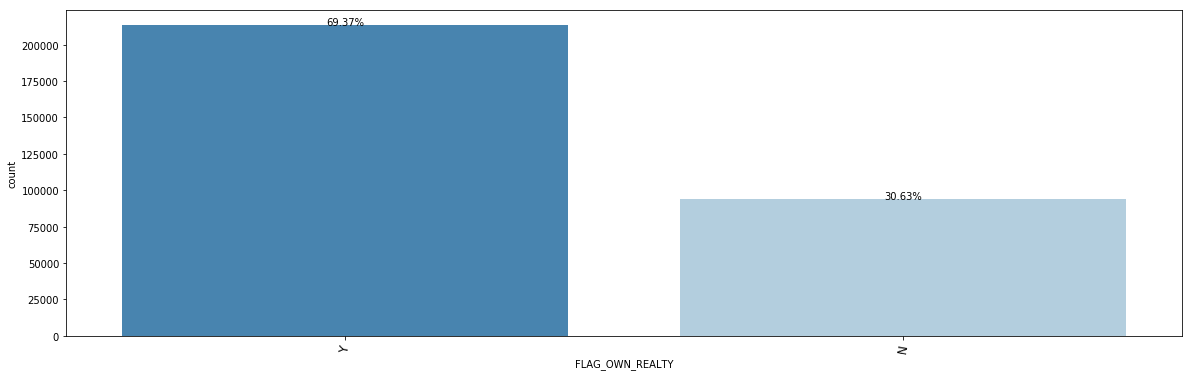

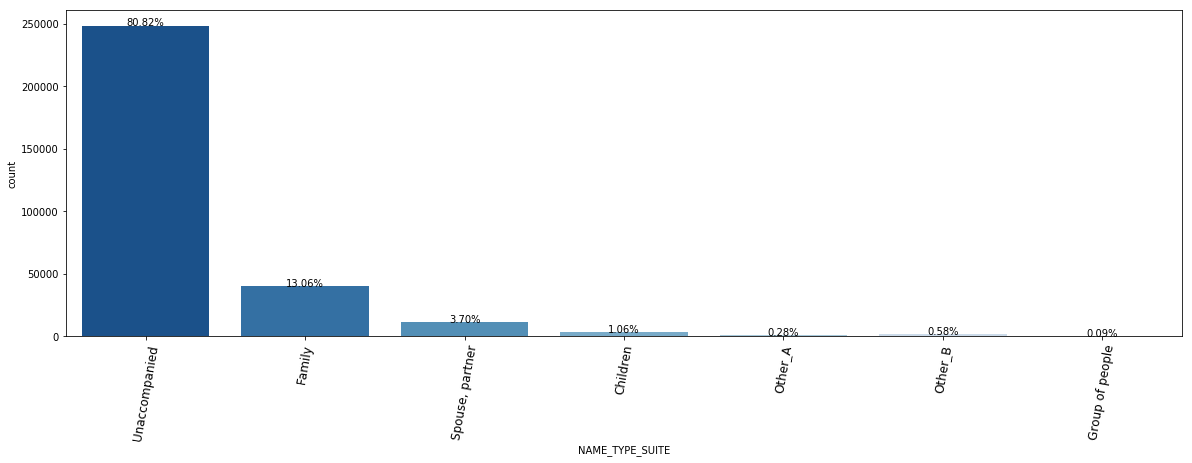

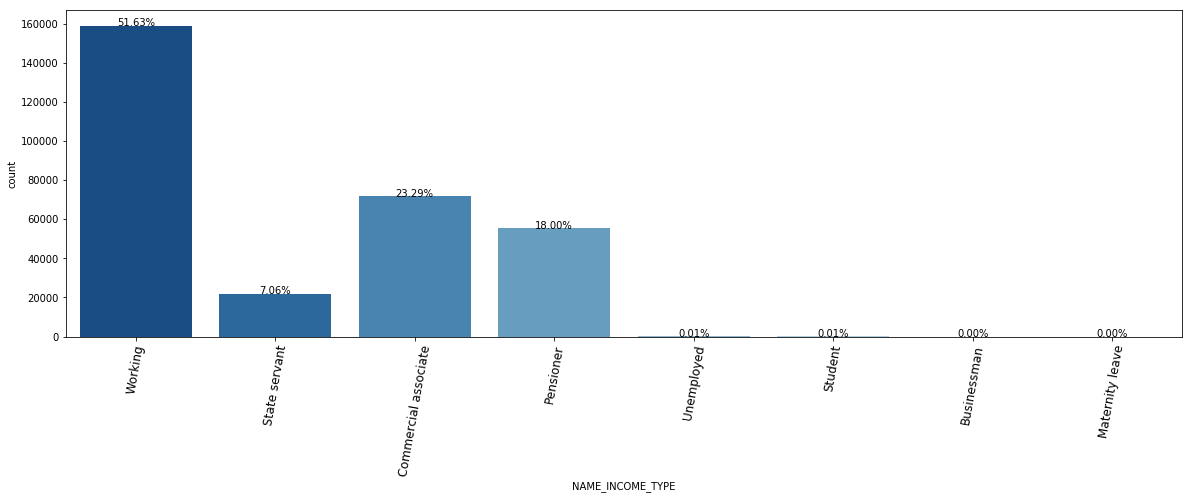

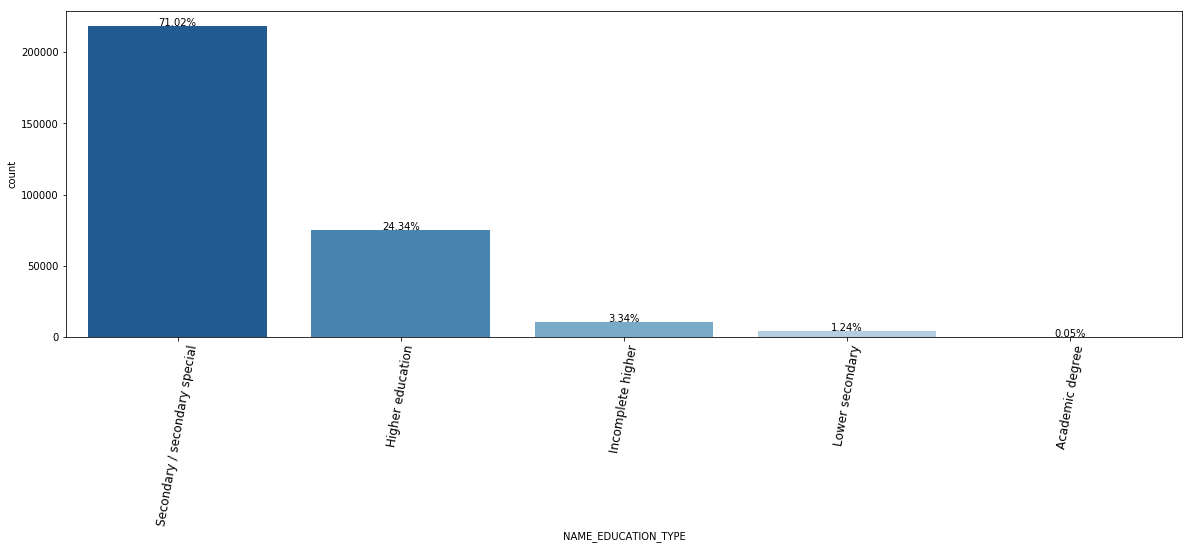

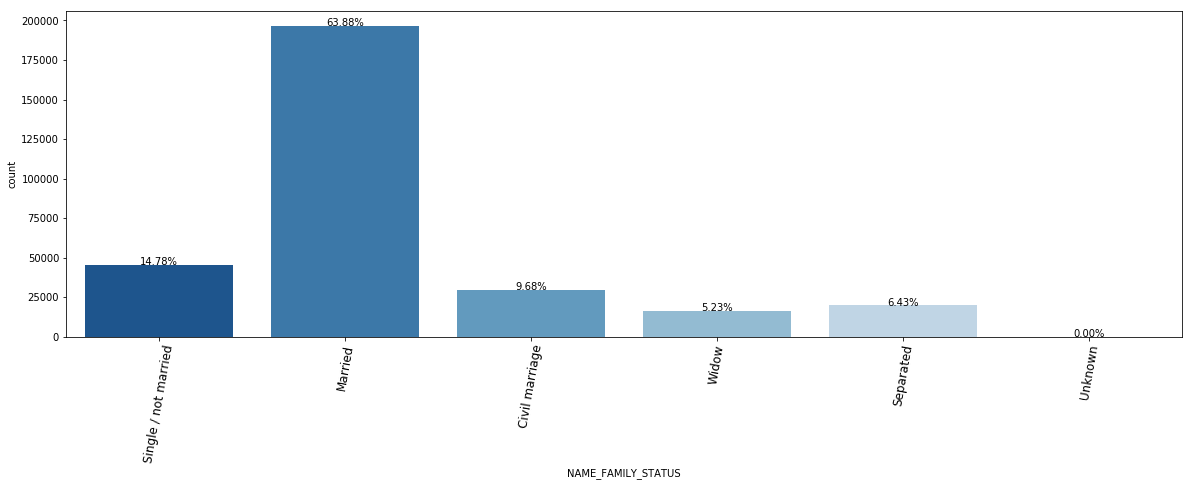

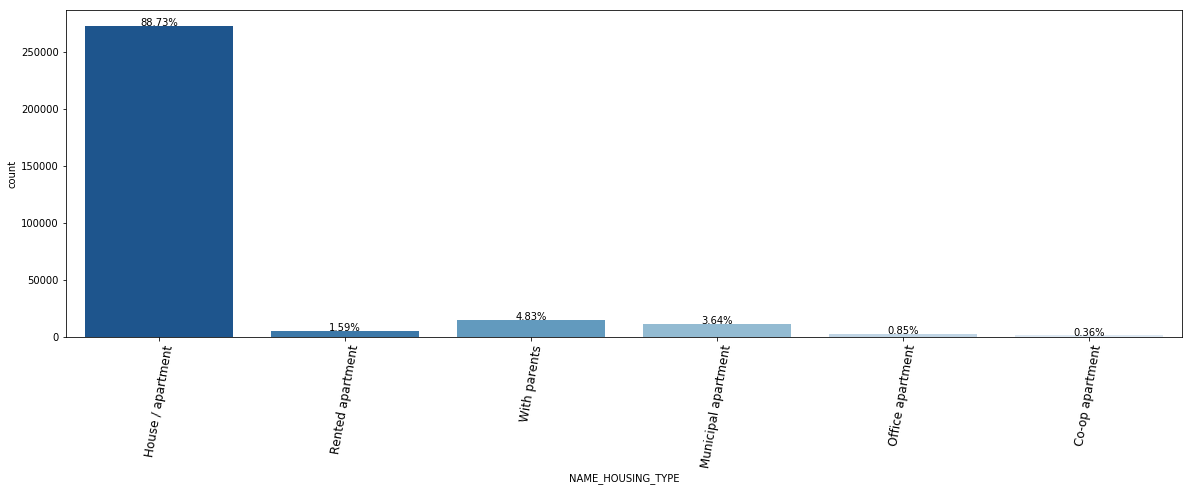

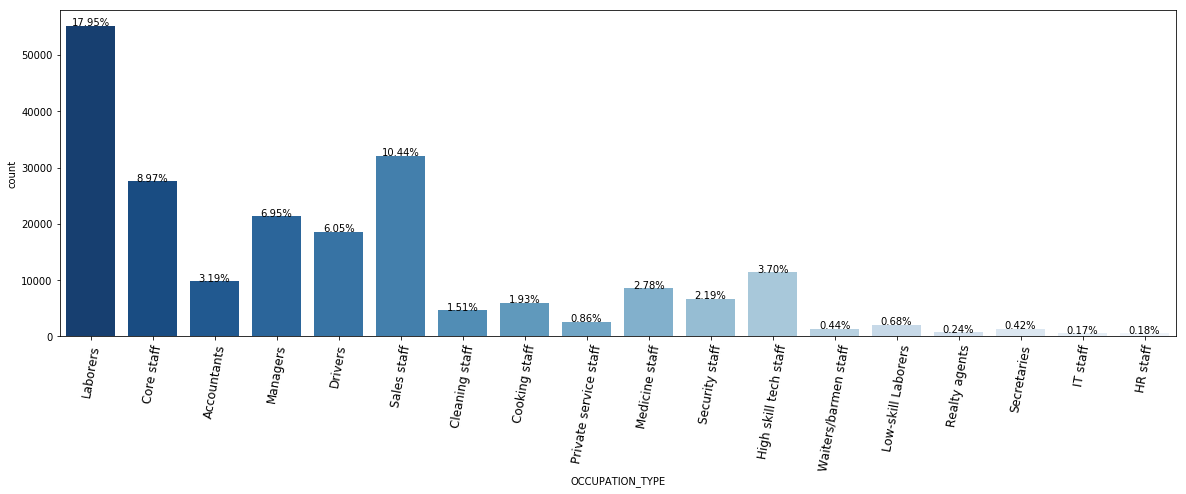

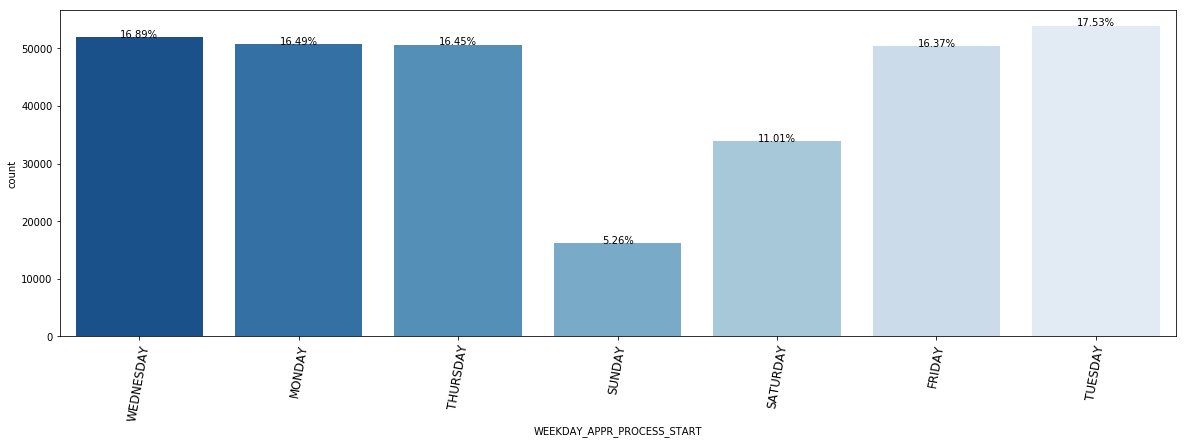

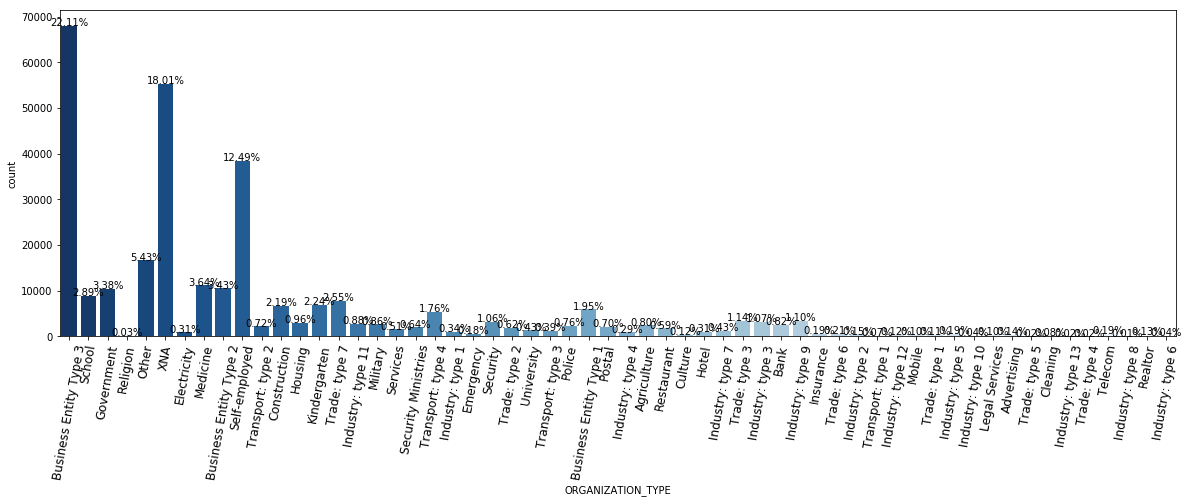

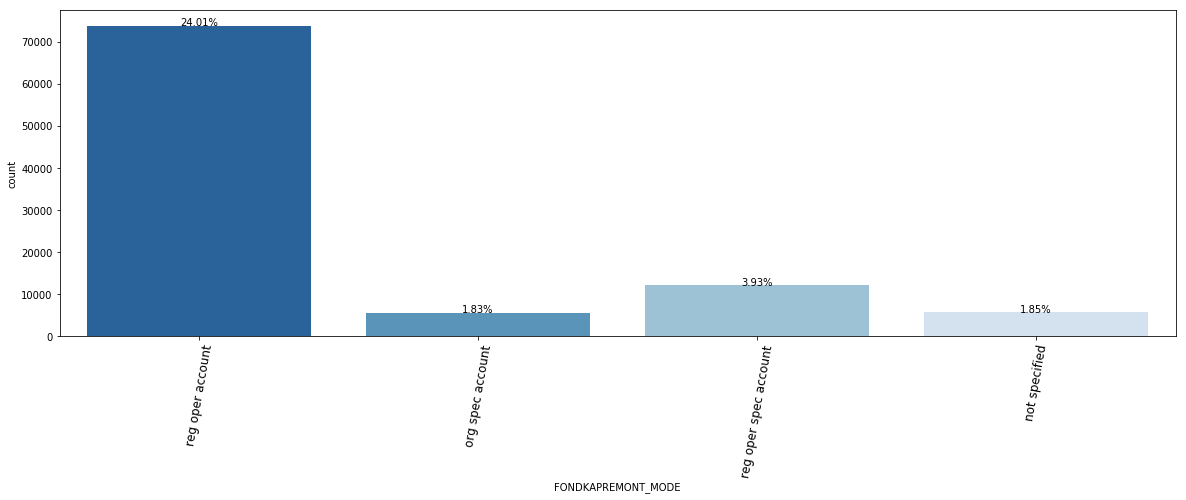

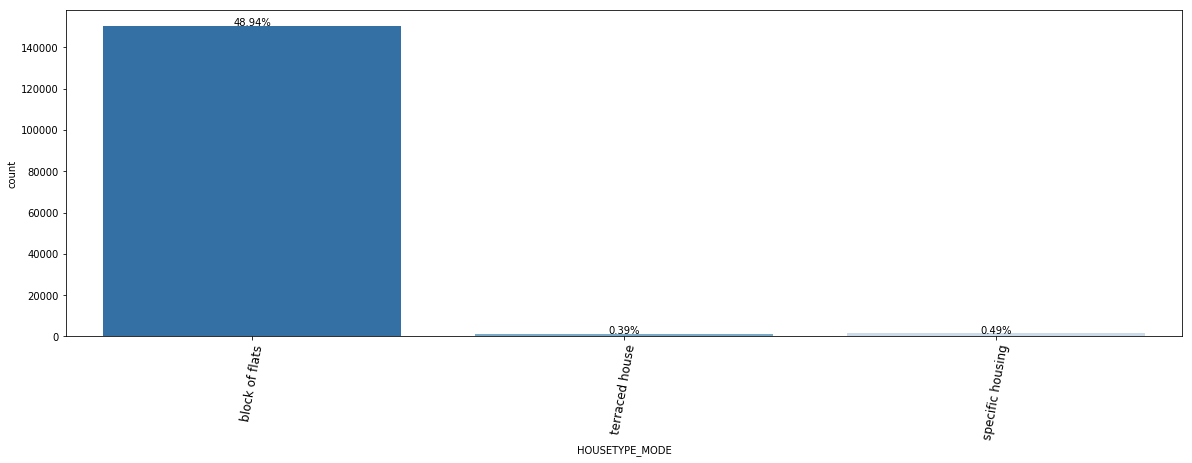

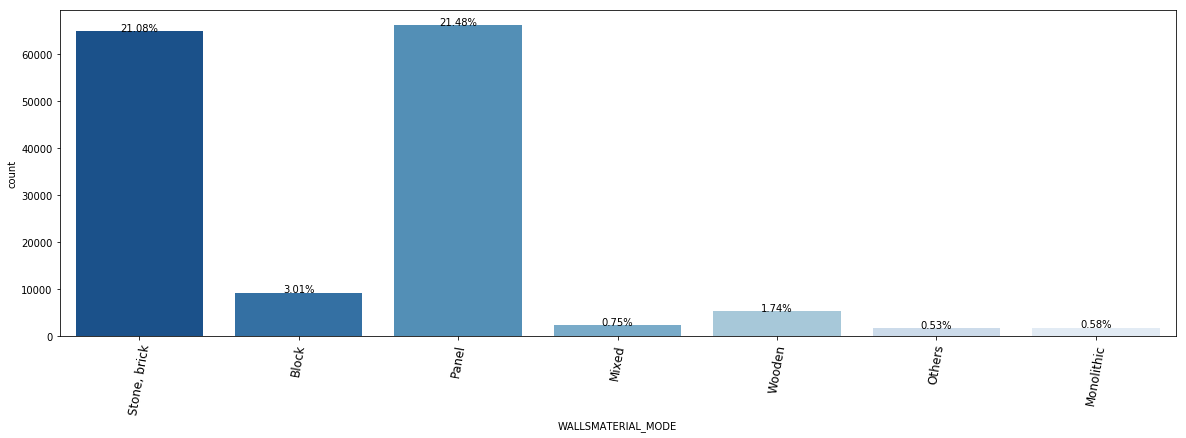

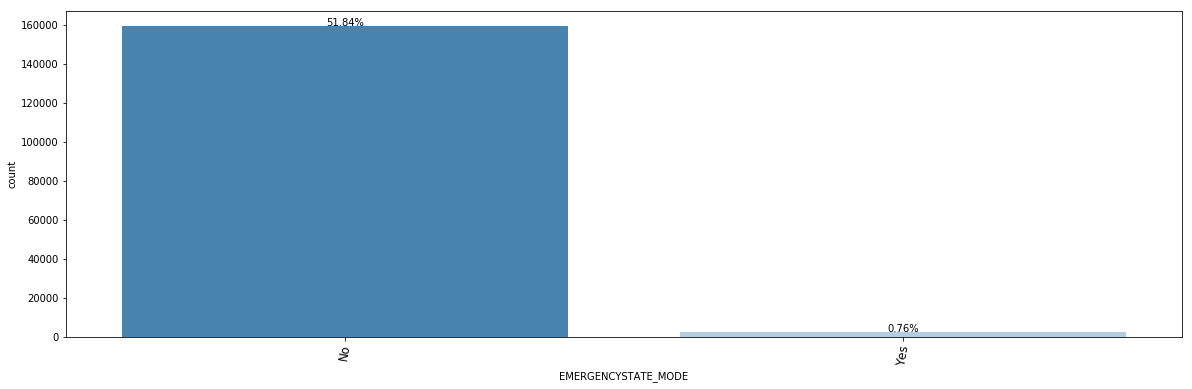

In [123]:
plt.subplots_adjust(top=0.92, bottom=0.5, left=0.10, right=0.5, hspace=0.4,wspace=0.02)
categorical_var = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 
                   'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
plot_number=1
total = float(len(app_train))     
for i in categorical_var:
    plt.figure(figsize=(20,6))
#     ax=plt.subplot(18,10,plot_number)
    ax = sns.countplot(app_train[i],palette='Blues_r') 
    plot_number=plot_number +1 
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
    plt.xticks(rotation=80,fontsize=12)
plt.show()

#### Take away
+ Gender of Application - women have applied for a larger majority of loans  
+ 66% of the application didn't own car
+ Almost 70% of the application Real Estate
+ Top 3 Type Suites which applies for loan are the houses which are: Unaccompanined/Family/Spouse
+ The income type of people who applies for loan, top 3 are :Working Class/Commercial Associate /Pensiner 
+ Top 3 oppucations who applied for loan : Laborers/Sales Staff/Core staff
+ 

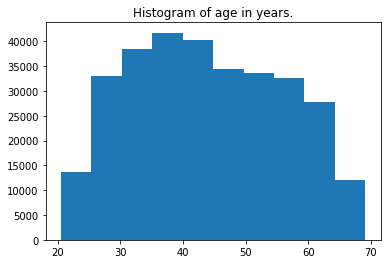

In [80]:
app_train['age'] = app_train['DAYS_BIRTH'] / -365
plt.hist(app_train['age']);
plt.title('Histogram of age in years.');

In [81]:
app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,age
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974,43.936973
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295,11.956133
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.517808
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.008219
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.150685
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,53.923288
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,69.120548


In [110]:
# Bin the age data
app_train['age_bin'] = pd.cut(app_train['age'], bins = np.linspace(20, 70, num = 11))
app_train['age_bin'].head(10)

0    (25.0, 30.0]
1    (45.0, 50.0]
2    (50.0, 55.0]
3    (50.0, 55.0]
4    (50.0, 55.0]
5    (45.0, 50.0]
6    (35.0, 40.0]
7    (50.0, 55.0]
8    (55.0, 60.0]
9    (35.0, 40.0]
Name: age_bin, dtype: category
Categories (10, interval[float64]): [(20.0, 25.0] < (25.0, 30.0] < (30.0, 35.0] < (35.0, 40.0] ... (50.0, 55.0] < (55.0, 60.0] < (60.0, 65.0] < (65.0, 70.0]]

KeyboardInterrupt: 

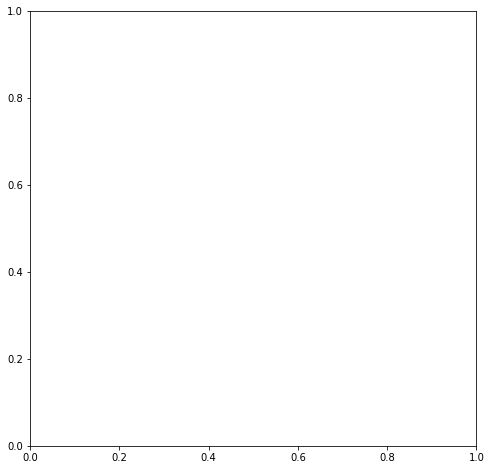

In [117]:
plt.figure(figsize = (8, 8))
 
# Graph the age bins and the average of the target as a bar plot
plt.bar(app_train['age_bin'], app_train['TARGET'])
 
# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

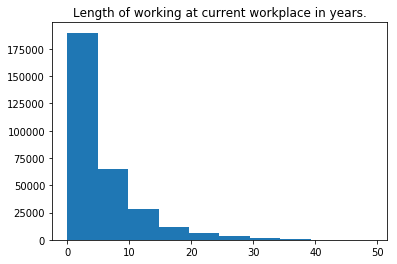

In [82]:
app_train.loc[app_train['DAYS_EMPLOYED'] == 365243, 'DAYS_EMPLOYED'] = 0
app_train['years_employed'] = app_train['DAYS_EMPLOYED'] / -365
plt.hist(app_train['years_employed']);
plt.title('Length of working at current workplace in years.');

In [83]:
app_train.groupby(['NAME_INCOME_TYPE']).agg({'years_employed': ['mean', 'median', 'count', 'max'], 'age': ['median']})

years_employed                                     age
                               mean    median   count        max     median
NAME_INCOME_TYPE                                                           
Businessman                7.874795  6.280822      10  14.917808  47.498630
Commercial associate       5.833627  4.147945   71617  48.071233  39.780822
Maternity leave            7.224110  8.273973       5  10.306849  39.350685
Pensioner                  0.002448 -0.000000   55362  35.246575  60.413699
State servant              9.454441  7.205479   21703  48.172603  40.693151
Student                    6.835160  5.069863      18  21.931507  36.663014
Unemployed                 0.000000 -0.000000      22  -0.000000  45.860274
Working                    6.446909  4.427397  158774  49.073973  39.876712

### Data Cleanning

## Features Engerring 

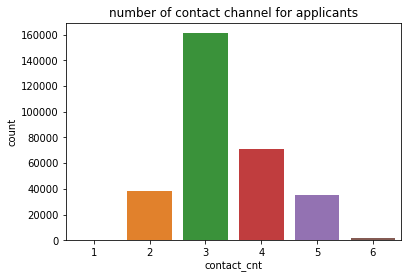

In [125]:
app_train['contact_cnt'] = app_train['FLAG_MOBIL'] + app_train['FLAG_EMP_PHONE'] + app_train['FLAG_WORK_PHONE'] + app_train['FLAG_CONT_MOBILE'] + app_train['FLAG_PHONE'] + app_train['FLAG_EMAIL']
sns.countplot(app_train['contact_cnt']);
plt.title('number of contact channel for applicants');

### Features from bureau 

In [92]:
bureau.head(10) 

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.00,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.00,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.00,71017.38,108982.62,0.0,Credit card,-31,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.0,0,42103.80,42103.80,0.00,0.0,Consumer credit,-22,NaN
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.0,0,76878.45,0.00,0.00,0.0,Consumer credit,-1710,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.0,0,103007.70,0.00,0.00,0.0,Consumer credit,-840,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.0,0,4500.00,0.00,0.00,0.0,Credit card,-690,NaN


In [ ]:
total count of loans in bureau, also separately in each status (credit_active);
whether any credit was in a different currency;
min, max, average of DAYS_CREDIT;
were there any days overdue and max value of it;
how long ago did previous and first cledits end;
max overdue amount and max overdue amount relative to credit amount;
were there prolongued credits;
min, max, average of AMT_CREDIT_SUM;
max AMT_CREDIT_SUM_DEBT;
max AMT_CREDIT_SUM_LIMIT;
count of credits of every type;
days since DAYS_CREDIT_UPDATE;

In [93]:
bureau_agg = bureau[['SK_ID_CURR']]
bureau_agg.head(2)

,SK_ID_CURR
0,215354
1,215354


In [97]:
bureau_agg['loans_count'] = bureau.groupby('SK_ID_CURR')['SK_ID_BUREAU'].transform('count')

[0          6.408658e-06
1          6.408658e-06
2          6.408658e-06
3          6.408658e-06
4          6.408658e-06
5          6.408658e-06
6          6.408658e-06
7          3.495632e-06
8          3.495632e-06
9          3.495632e-06
10         3.495632e-06
11         3.495632e-06
12         3.495632e-06
13         5.826053e-07
14         4.660842e-06
15         4.660842e-06
16         4.660842e-06
17         4.660842e-06
18         4.660842e-06
19         4.660842e-06
20         4.660842e-06
21         4.660842e-06
22         4.660842e-06
23         4.660842e-06
24         4.660842e-06
25         4.660842e-06
26         4.660842e-06
27         2.330421e-06
28         2.330421e-06
29         2.330421e-06
               ...     
1716398    4.078237e-06
1716399    2.913026e-06
1716400    5.243447e-06
1716401    2.330421e-06
1716402    6.991263e-06
1716403    3.495632e-06
1716404    5.243447e-06
1716405    4.660842e-06
1716406    3.495632e-06
1716407    8.739079e-06
1716408    8.73

In [ ]:
bureau_agg = bureau[['SK_ID_CURR']]
bureau_agg['loans_count'] = bureau.groupby('SK_ID_CURR')['SK_ID_BUREAU'].transform('count')
# There was an error, thanks to Fenglv for noticing
# bureau_agg[['Active_count', 'Bad_debt_count', 'Closed_count', 'Sold_count']] = pd.crosstab(bureau['SK_ID_CURR'], bureau['CREDIT_ACTIVE']).reset_index(drop=True)
bureau_agg = bureau_agg.join(pd.crosstab(bureau['SK_ID_CURR'], bureau['CREDIT_ACTIVE']), on='SK_ID_CURR')

In [98]:
bureau_agg['DAYS_CREDIT_mean'] = bureau.groupby('SK_ID_CURR')['DAYS_CREDIT'].transform('mean') * -1
bureau_agg['DAYS_CREDIT_max'] = bureau.groupby('SK_ID_CURR')['DAYS_CREDIT'].transform('max') * -1
bureau_agg['DAYS_CREDIT_min'] = bureau.groupby('SK_ID_CURR')['DAYS_CREDIT'].transform('min') * -1
bureau_agg['DAYS_CREDIT_6m']=bureau.groupby('SK_ID_CURR')['DAYS_CREDIT'].sum()/-183
bureau_agg['DAYS_CREDIT_12m']=bureau.groupby('SK_ID_CURR')['DAYS_CREDIT'].sum()/-365

In [107]:
bureau_agg['AMT_CREDIT_SUM_mean'] = bureau.groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].transform('mean')
bureau_agg['AMT_CREDIT_SUM_max'] = bureau.groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].transform('max')
bureau_agg['AMT_CREDIT_SUM_min'] = bureau.groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].transform('min')
bureau_agg['AMT_CREDIT_SUM_DEBT_max'] = bureau.groupby('SK_ID_CURR')['AMT_CREDIT_SUM_DEBT'].transform('max')
bureau_agg['AMT_CREDIT_SUM_LIMIT_max'] = bureau.groupby('SK_ID_CURR')['AMT_CREDIT_SUM_LIMIT'].transform('max')
bureau_agg['DAYS_CREDIT_UPDATE_max'] = bureau.groupby('SK_ID_CURR')['DAYS_CREDIT_UPDATE'].transform('max') * -1

In [ ]:
bureau_agg = bureau_agg.join(pd.crosstab(bureau['SK_ID_CURR'], bureau['CREDIT_TYPE']).reset_index(), on='SK_ID_CURR', rsuffix='y')
bureau_agg.drop('SK_ID_CURRy', axis=1, inplace=True)

In [ ]:
bureau_agg = bureau[['SK_ID_CURR']]
bureau_agg['loans_count'] = bureau.groupby('SK_ID_CURR')['SK_ID_BUREAU'].transform('count')
# There was an error, thanks to Fenglv for noticing
# bureau_agg[['Active_count', 'Bad_debt_count', 'Closed_count', 'Sold_count']] = pd.crosstab(bureau['SK_ID_CURR'], bureau['CREDIT_ACTIVE']).reset_index(drop=True)
bureau_agg = bureau_agg.join(pd.crosstab(bureau['SK_ID_CURR'], bureau['CREDIT_ACTIVE']), on='SK_ID_CURR')

bureau_agg['CREDIT_DAY_OVERDUE_max'] = bureau.groupby('SK_ID_CURR')['CREDIT_DAY_OVERDUE'].transform('max')
bureau_agg['DAYS_CREDIT_ENDDATE_min'] = bureau.groupby('SK_ID_CURR')['DAYS_CREDIT_ENDDATE'].transform('min')
bureau_agg['DAYS_CREDIT_ENDDATE_max'] = bureau.groupby('SK_ID_CURR')['DAYS_CREDIT_ENDDATE'].transform('max')
bureau_agg['AMT_CREDIT_MAX_OVERDUE_max'] = bureau.groupby('SK_ID_CURR')['AMT_CREDIT_MAX_OVERDUE'].transform('max')

bureau_agg['AMT_CREDIT_SUM_DEBT_max'] = bureau.groupby('SK_ID_CURR')['AMT_CREDIT_SUM_DEBT'].transform('max')
bureau_agg['AMT_CREDIT_SUM_LIMIT_max'] = bureau.groupby('SK_ID_CURR')['AMT_CREDIT_SUM_LIMIT'].transform('max')
bureau_agg['DAYS_CREDIT_UPDATE_max'] = bureau.groupby('SK_ID_CURR')['DAYS_CREDIT_UPDATE'].transform('max') * -1

bureau_agg = bureau_agg.join(pd.crosstab(bureau['SK_ID_CURR'], bureau['CREDIT_TYPE']).reset_index(), on='SK_ID_CURR', rsuffix='y')
bureau_agg.drop('SK_ID_CURRy', axis=1, inplace=True)

bureau_agg.fillna(0, inplace=True)